In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 各年のオリーブオイルを使ったレシピの料理別数を求める

特定の名前でデータの抽出を行っているが、2パターンある。

1.

df = df[df["列の名前"].isin(["探したい単語1", "探したい単語2"])]

2.

df = df.query('name.str.contains("パン|ぱん")', engine="python")

※意味はよくわからないが、engine="python"がないとエラーが出る。


違いとしては、1は探したい単語に含まれるか、2は探したい単語を含んでいるかである。ややこしいね。材料だったら簡潔に単語1つで書かれているから、1の方法だけど、料理名だと、いろんな言葉が組み合わさってるから、2の方法を使った。

In [2]:
def recipe_mokomichi():
    """
    各年のオリーブオイルを使ったレシピの料理別数を求める
    """
    col_names_recipe = ["recipe_id", "name"]
    col_names_ingredient = ["recipe_id", "ingredient"]
    year = []
    for i in range(1998, 2015):
        year.append(i)
    
    total_dish = []
    total_olive_recipe = []

    for i in year:
        # csvファイルを読み込む
        recipe = pd.read_csv(f"recipe{i}.csv", names=col_names_recipe, usecols=[0, 2])
        ingredient = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/dataset/ingredient/ingredient{i}.csv", names=col_names_ingredient, usecols=[0, 1])

        # ingredientからオリーブオイルの行だけ抽出する
        ingredient_olive = ingredient[ingredient["ingredient"].isin(["オリーブオイル", "オリーブ油", "おりーぶおいる"])]

        total_olive_recipe.append(len(ingredient_olive))

        # オリーブオイルを使ったレシピだけでrecipeとingredientを結合
        df = pd.merge(ingredient_olive, recipe, on="recipe_id", how="left")

        # 欠損値を補完する
        df["name"] = df["name"].fillna("no-data")

        salad = len(df.query('name.str.contains("サラダ")', engine="python"))
        pasta = len(df.query('name.str.contains("パスタ|スパゲッティ｜スパゲティ|ペンネ|ペペロンチーノ|カルボナーラ|ボロネーゼ")', engine="python"))
        hamburg = len(df.query('name.str.contains("バーグ")', engine="python"))
        doria = len(df.query('name.str.contains("ドリア|グラタン|リゾット")', engine="python"))
        pizza = len(df.query('name.str.contains("ピザ|ピッザ|ピッツァ")', engine="python"))
        bread = len(df.query('name.str.contains("パン|ぱん")', engine="python"))

        dish = [salad, pasta, hamburg, doria, pizza, bread]
        
        total_dish.append(dish)
        
    return total_dish, total_olive_recipe

total_dish, total_olive_recipe = recipe_mokomichi()

In [3]:
total_olive_recipe

[3,
 30,
 349,
 638,
 967,
 1323,
 1429,
 1628,
 2656,
 6280,
 8619,
 12704,
 15292,
 14074,
 19084,
 19052,
 16985]

In [4]:
total_dish

[[1, 0, 0, 0, 0, 0],
 [3, 2, 0, 2, 1, 0],
 [36, 52, 0, 12, 5, 7],
 [60, 84, 2, 26, 15, 22],
 [95, 169, 1, 24, 17, 32],
 [109, 216, 4, 64, 41, 33],
 [135, 255, 7, 45, 33, 45],
 [143, 276, 7, 57, 55, 51],
 [220, 471, 13, 82, 73, 92],
 [488, 1314, 32, 195, 166, 192],
 [583, 1826, 40, 275, 206, 282],
 [1036, 2517, 54, 403, 286, 390],
 [1132, 2914, 99, 460, 309, 447],
 [1029, 2603, 81, 423, 310, 489],
 [1507, 3382, 141, 590, 419, 663],
 [1501, 3221, 145, 551, 392, 683],
 [1416, 2846, 108, 468, 373, 593]]

In [7]:
ratio = []
for i in range(len(total_olive_recipe)):
    array = []
    for j in range(len(total_dish[0])):
        array.append(total_dish[i][j] / total_olive_recipe[i])
    ratio.append(array)
print(ratio)

[[0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0], [0.1, 0.06666666666666667, 0.0, 0.06666666666666667, 0.03333333333333333, 0.0], [0.10315186246418338, 0.1489971346704871, 0.0, 0.034383954154727794, 0.014326647564469915, 0.02005730659025788], [0.09404388714733543, 0.13166144200626959, 0.003134796238244514, 0.04075235109717868, 0.023510971786833857, 0.034482758620689655], [0.09824198552223372, 0.17476732161323683, 0.001034126163391934, 0.02481902792140641, 0.017580144777662874, 0.033092037228541885], [0.08238851095993953, 0.16326530612244897, 0.0030234315948601664, 0.04837490551776266, 0.030990173847316706, 0.024943310657596373], [0.09447165850244926, 0.17844646606018194, 0.00489853044086774, 0.031490552834149754, 0.02309307207837649, 0.031490552834149754], [0.08783783783783784, 0.16953316953316952, 0.0042997542997543, 0.03501228501228501, 0.033783783783783786, 0.03132678132678133], [0.08283132530120482, 0.1773343373493976, 0.004894578313253012, 0.030873493975903613, 0.027484939759036143,

In [9]:
ratio_t = np.array(ratio).T
print(ratio_t)

[[0.33333333 0.1        0.10315186 0.09404389 0.09824199 0.08238851
  0.09447166 0.08783784 0.08283133 0.07770701 0.06764126 0.08154912
  0.07402563 0.07311354 0.07896667 0.07878438 0.08336768]
 [0.         0.06666667 0.14899713 0.13166144 0.17476732 0.16326531
  0.17844647 0.16953317 0.17733434 0.20923567 0.21185752 0.19812657
  0.19055715 0.18495097 0.17721652 0.16906362 0.16755961]
 [0.         0.         0.         0.0031348  0.00103413 0.00302343
  0.00489853 0.00429975 0.00489458 0.00509554 0.00464091 0.00425063
  0.00647397 0.00575529 0.00738839 0.00761075 0.00635855]
 [0.         0.06666667 0.03438395 0.04075235 0.02481903 0.04837491
  0.03149055 0.03501229 0.03087349 0.03105096 0.03190625 0.03172229
  0.03008109 0.03005542 0.03091595 0.02892085 0.02755372]
 [0.         0.03333333 0.01432665 0.02351097 0.01758014 0.03099017
  0.02309307 0.03378378 0.02748494 0.02643312 0.02390068 0.02251259
  0.02020664 0.02202643 0.02195556 0.02057527 0.02196055]
 [0.         0.         0.0200

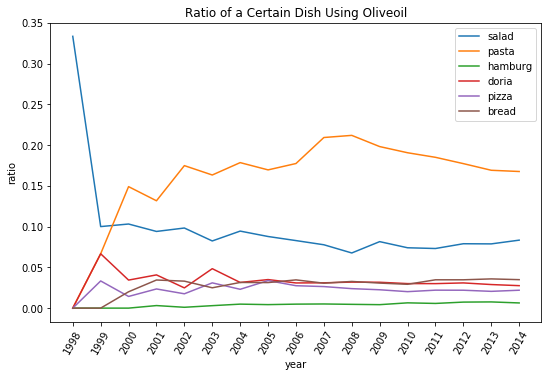

In [28]:
dish_name = ["salad", "pasta", "hamburg", "doria", "pizza", "bread"]
year = []
str_year = []
for i in range(1998, 2015):
    year.append(i)
    str_year.append(str(i))

fig = plt.figure(figsize=(8.8, 5.5))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(ratio_t)):
    ax.plot(year, ratio_t[i], label=dish_name[i])
"""
ax.plot(year, total_user_adjusted)
ax.bar(year, ratio, color="lightgreen",tick_label=year, yerr=se, ecolor="black", error_kw=error_bar_set, width=0.65)
ax.text(0.70, 0.88, "total number of users", size = 10, transform=ax.transAxes)
"""
ax.set_xticklabels(str_year, rotation=60)
ax.set_title("Ratio of a Certain Dish Using Oliveoil")
ax.set_xlabel("year")
ax.set_ylabel("ratio")
ax.legend()

xaxis = ax.xaxis
xaxis.set_major_locator(ticker.FixedLocator(year))

plt.savefig("dishes_1.png")

In [19]:
len(year)

17

In [18]:
ratio_t.shape

(6, 17)

In [24]:
str_year

['1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [1]:
import numpy as np
p = 0.45
print((p-0.4329) / np.sqrt(p*(1-p)/600))

0.841945798298636


In [6]:
print((32.9*(np.sqrt(0.45*0.55)+np.sqrt(6)/5))**2)

1055.2872995737205
